# Practice Day 1. Regression

### Load File

In [1]:
file = open('data/regression_data.txt','r')  # open the file with read-only
text = file.readlines()  # read all line texts
file.close()  # close the file

x_data = []
y_data = []

# convert to float
for s in text:
    data = s.split()
    x_data.append(float(data[0]))
    y_data.append(float(data[1]))    

### Save File

In [2]:
file = open('data/saved_data.txt','w')  # open the file with write mode

file.write("this is saved file \n")

for i in range(5):
    file.write("data : {} \n".format(i))

file.close()  # close the file

### Numpy

In [3]:
import numpy as np

a = np.asarray([1,2,3,4])
b = np.asarray([3,2,1,0])

print(a)
print(b)
print(a.shape)
print(b.shape)

print("----------------")

print(np.sum(a))
print(np.mean(a))
print(np.max(a))
print(np.min(a))

print("----------------")

print(a + 2)
print(a * 2)
print(a ** 2)

print("----------------")

print(a + b)
print(a - b)
print(a * b)

[1 2 3 4]
[3 2 1 0]
(4,)
(4,)
----------------
10
2.5
4
1
----------------
[3 4 5 6]
[2 4 6 8]
[ 1  4  9 16]
----------------
[4 4 4 4]
[-2  0  2  4]
[3 4 3 0]


### File I/O with Numpy

In [4]:
# save npy file
np.save("data/x_data.npy",x_data)

# load npy file
x_data = np.load('data/x_data.npy')

### Plot data

<IPython.core.display.Javascript object>


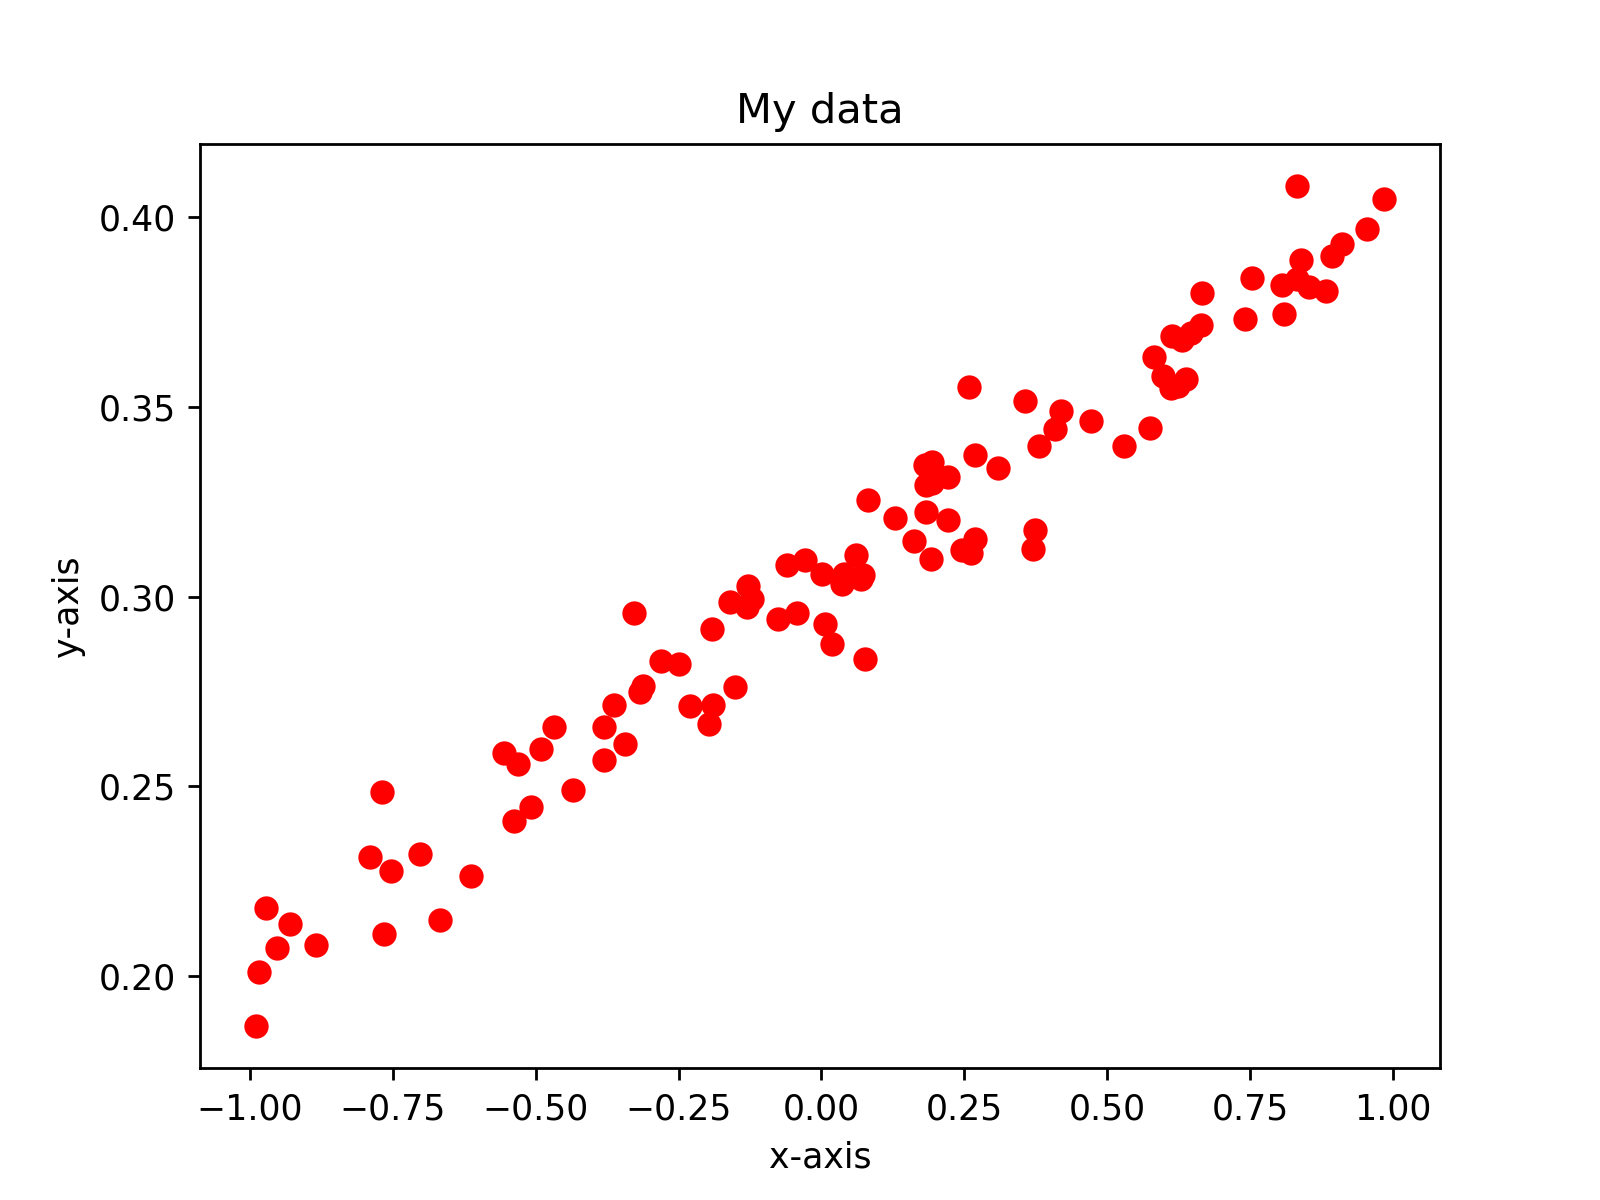

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(x_data, y_data, 'ro') # plot data

plt.xlabel('x-axis')  
plt.ylabel('y-axis')
plt.title('My data')

plt.show()

### Closed Form Linear Regression

In [6]:
# convert to numpy-array
x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

N = len(x_data) # the size of data

sigma_x = np.sum(x_data)  # sum of elments
sigma_x_square = np.sum(x_data * x_data)  # element-wise multiplication
sigma_y = np.sum(y_data)
sigma_xy = np.sum(x_data * y_data)

w1 = (N * sigma_xy - sigma_x * sigma_y) / (N * sigma_x_square - sigma_x**2)
w0 = (sigma_y - w1 * sigma_x)/N

print ('w1 : {}'.format(w1))
print ('w0 : {}'.format(w0))

w1 : 0.09899380848051839
w0 : 0.3020929765082997


<IPython.core.display.Javascript object>


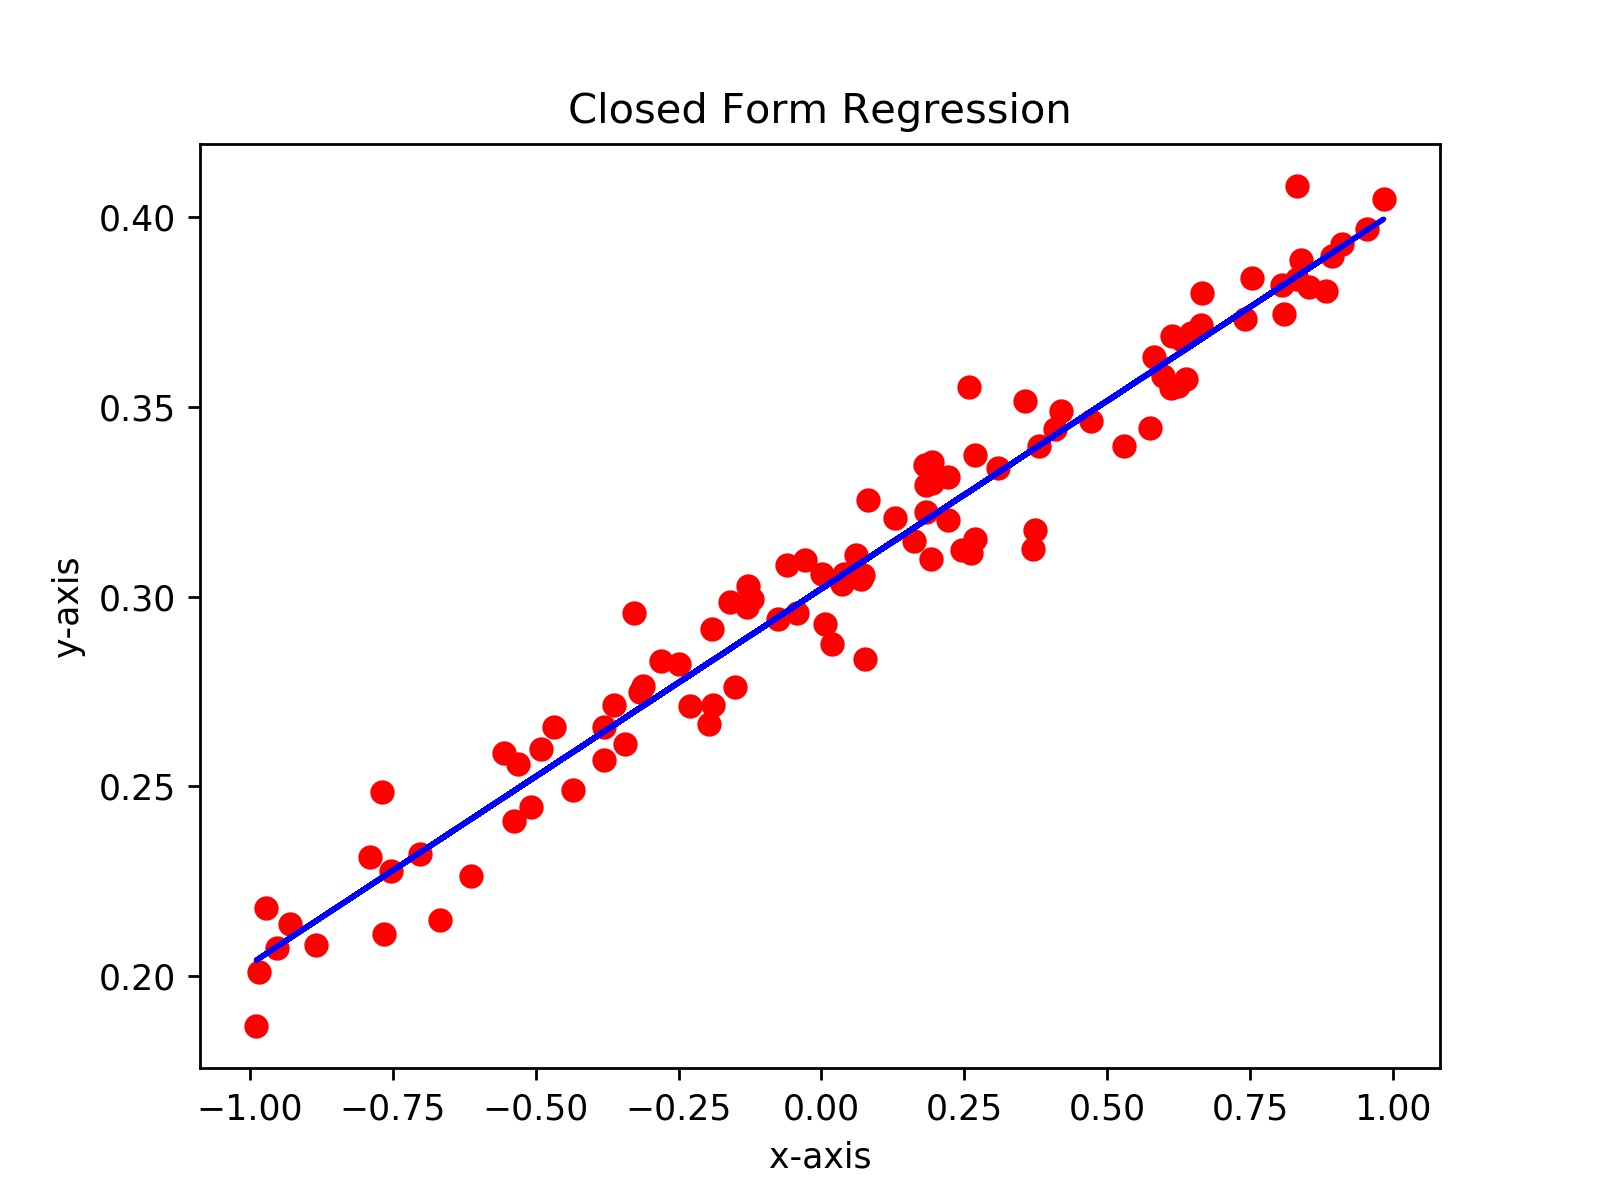

In [7]:
plt.figure(2)

y_regression = w1 * x_data + w0

plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, y_regression, 'b')

plt.xlabel('x-axis')  
plt.ylabel('y-axis')
plt.title('Closed Form Regression')

plt.show()

### Tensorflow

In [8]:
import tensorflow as tf
a = tf.add(3,5)
print(a)

Tensor("Add:0", shape=(), dtype=int32)


In [9]:
a = tf.add(3,5)
sess = tf.Session()
print(sess.run(a))
sess.close()

8


In [10]:
x = 2
y = 3
add_op = tf.add(x,y)
mul_op = tf.multiply(x,y)
useless = tf.multiply(x, add_op)
pow_op = tf.pow(add_op, mul_op)
with tf.Session() as sess:
    z, not_useless = sess.run([pow_op, useless])

In [11]:
# create variables with tf.get variable
s = tf.get_variable("scalar", initializer=tf.constant(2))
m = tf.get_variable("matrix", initializer=tf.constant([[0,1],[2,3]]))
W = tf.get_variable("big_matrix", shape=(784,10), initializer=tf.zeros_initializer())

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

In [13]:
a = tf.placeholder(tf.float32, shape=[3])

b = tf.constant([5,5,5], tf.float32)

c = a + b

with tf.Session() as sess:
    print(sess.run(c,{a:[1,2,3]}))

[6. 7. 8.]


### Linear Regression with Gradient Descent

In [14]:
import tensorflow as tf

# define constant
c = tf.constant(0)

# define variables
w = tf.Variable(tf.random_uniform([1],-0.1,0.1))
b = tf.Variable(tf.zeros([1]))

# define placeholder
x_data_placeholder = tf.placeholder('float32', shape=x_data.shape)
y_data_placeholder = tf.placeholder('float32', shape=y_data.shape)

# define loss function
y_regression = w * x_data_placeholder + b

loss = tf.reduce_mean(tf.square(y_regression - y_data_placeholder))

# define optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.7).minimize(loss)

# initialize variables
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

In [15]:
# see initial variables
my_feed_dict = {x_data_placeholder:x_data, y_data_placeholder:y_data}

initial_w, initial_b = sess.run([w,b], feed_dict=my_feed_dict)

print("Initial variables  w : {}, b : {}".format(initial_w, initial_b)) 

Initial variables  w : [0.05434232], b : [0.]


<IPython.core.display.Javascript object>


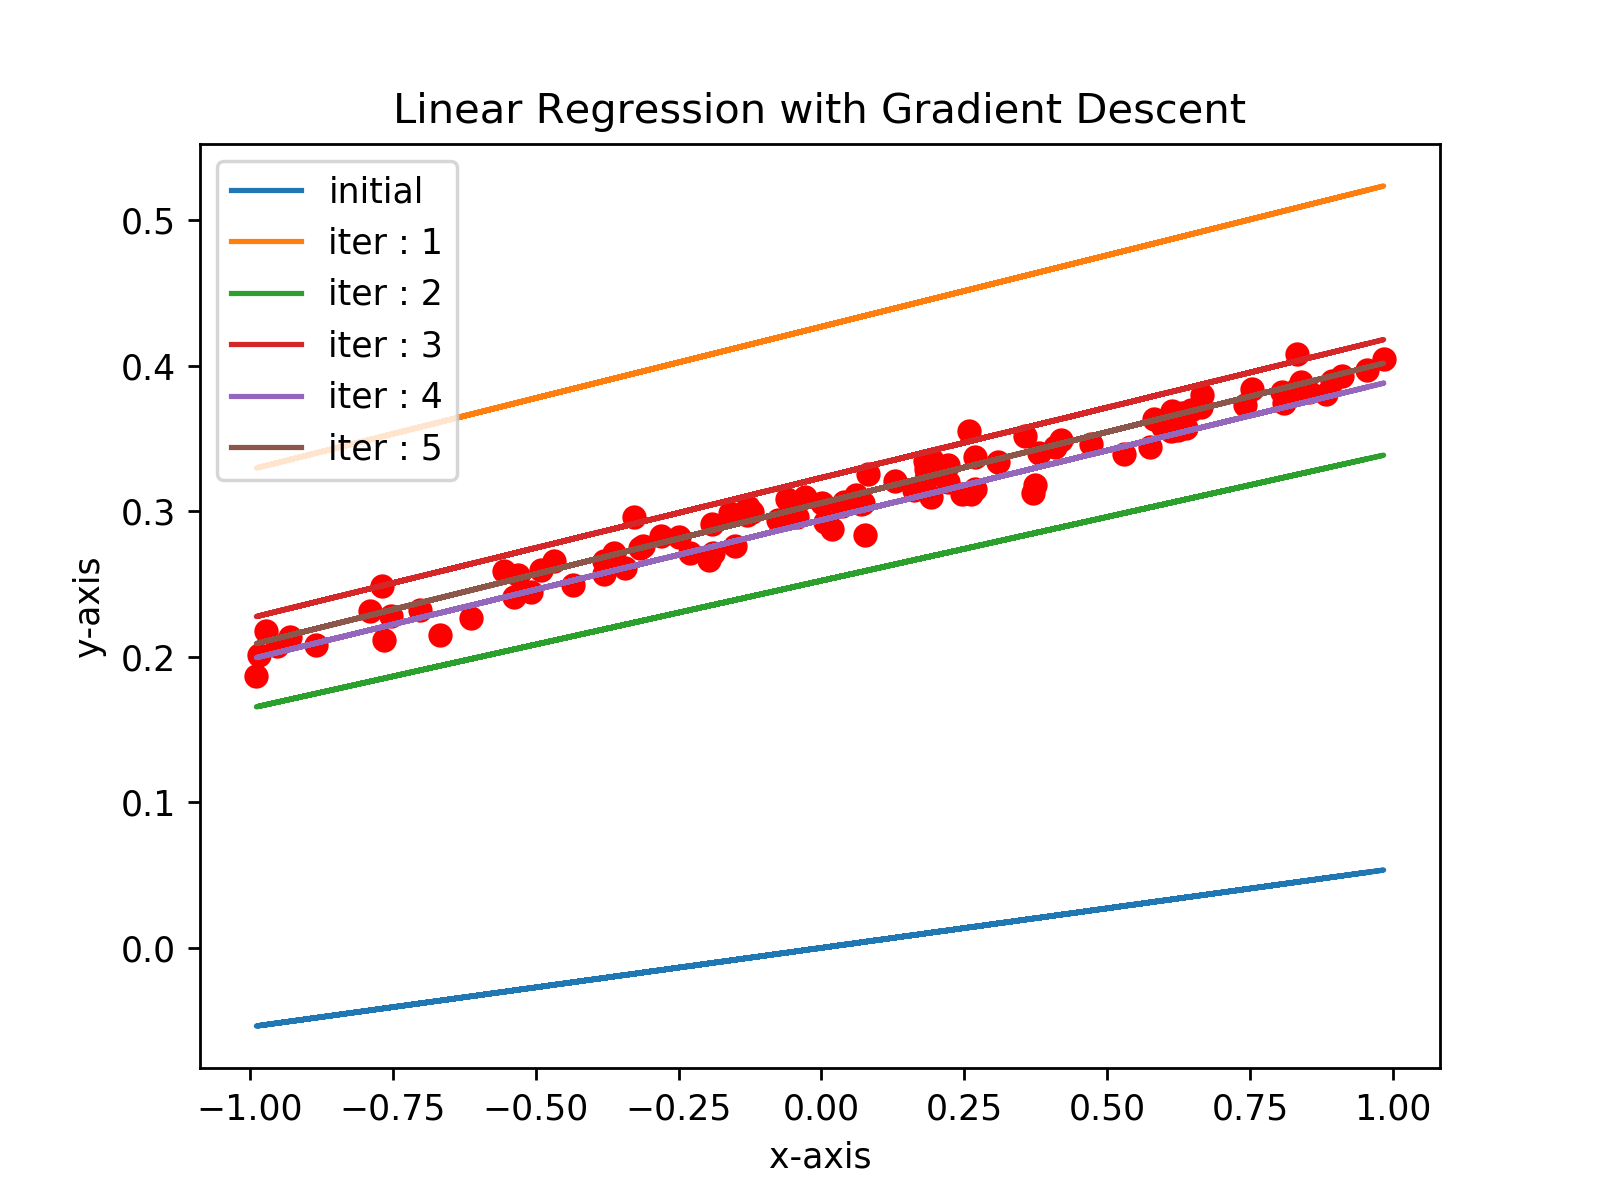

iteration : 1, w : [0.09827425], b : [0.42682043], loss : 0.01566188782453537
iteration : 2, w : [0.08769111], b : [0.25226468], loss : 0.0027049256023019552
iteration : 3, w : [0.09649056], b : [0.32300904], loss : 0.0005487068556249142
iteration : 4, w : [0.09565559], b : [0.29394466], loss : 0.00018889657803811133
iteration : 5, w : [0.09768222], b : [0.30564314], loss : 0.00012848508777096868


In [16]:
plt.figure(3)
plt.xlabel('x-axis')  
plt.ylabel('y-axis')
plt.title('Linear Regression with Gradient Descent')

plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, (initial_w * x_data + initial_b), label='initial')

# training step

for i in range(1,6):
    sess.run(train, feed_dict=my_feed_dict)
    current_w, current_b, current_loss = sess.run([w,b,loss], feed_dict=my_feed_dict)
    print("iteration : {}, w : {}, b : {}, loss : {}".format(i,current_w, current_b, current_loss))
    
    # display
    plt.plot(x_data, (current_w * x_data + current_b), label='iter : {}'.format(i))
        
plt.legend()

plt.show()